<h2><b>Input : </b></h2>

*   train_microarray.csv
*   test_microarray.csv
*   suspect.csv
* ab1_features.pkl
* ab2_features.pkl
* ab3_features.pkl
* ab1_model.pkl
* ab2_model.pkl
* ab3_model.pkl

<h2><b>Output : </b></h2>

*   test_microarray_prediksi_ab.csv
*   suspect_prediksi_ab.csv

# Run All

## Import dan Load

Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics

import joblib

Load data

In [2]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1_r9KdY3hz2zVtCD6VZs2nHrnXBGbia8v')
df_test = pd.read_csv('https://drive.google.com/uc?id=1MLHK9Ztyc2jgcN9h3jxBshKmyg10AGQj')
df_suspect = pd.read_csv('https://drive.google.com/uc?id=1QVbwJZlaSkN0T77OlOucnJzy7MYJjE0R')

Load hasil seleksi fitur

In [3]:
ab1_features = joblib.load('ab1_features.pkl')
ab2_features = joblib.load('ab2_features.pkl')
ab3_features = joblib.load('ab3_features.pkl')

Load hyperparameter tuning

In [4]:
ab1_model = joblib.load('ab1_model.pkl')
ab2_model = joblib.load('ab2_model.pkl')
ab3_model = joblib.load('ab3_model.pkl')

Mengambil fitur dari df_train awal

In [5]:
df_train1 = df_train[ab1_features]
df_train2 = df_train[ab2_features]
df_train3 = df_train[ab3_features]

Mengambil fitur dari df_test awal

In [6]:
df_test1 = df_test[ab1_features]
df_test2 = df_test[ab2_features]
df_test3 = df_test[ab3_features]

Mengambil fitur dari df_suspect

In [7]:
df_suspect1 = df_suspect[ab1_features[:-1]]
df_suspect2 = df_suspect[ab2_features[:-1]]
df_suspect3 = df_suspect[ab3_features[:-1]]

### Contoh Data Train

In [8]:
df_train1.head()

,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,207730_x_at,216609_at,207953_at,217679_x_at,210168_at,...,206544_x_at,200598_s_at,212515_s_at,213872_at,202435_s_at,211505_s_at,40665_at,208654_s_at,202817_s_at,Label
0,2.672850,2.223647,2.894223,2.730180,2.708516,3.043026,2.318040,2.462324,2.748249,2.698125,...,2.584677,2.614547,2.459196,2.371555,1.859862,2.449663,2.464299,2.940958,2.116067,1.0
1,2.641439,2.350872,3.042087,2.856150,2.800348,3.129235,2.306733,2.476773,2.884853,2.293900,...,2.541014,2.464834,2.651054,2.249695,1.991560,2.262768,2.172416,2.875015,2.354635,0.0
2,2.510368,1.996011,2.624352,2.491994,2.648607,2.921754,2.231919,2.371051,2.482992,2.399431,...,2.408422,2.665663,2.371579,2.046329,2.353558,2.198965,2.246445,2.710852,1.743328,1.0
3,2.747069,2.666440,2.893101,2.998907,2.992614,3.307086,1.966337,2.863540,3.172937,2.521457,...,2.314931,2.019661,2.192755,2.209179,1.973821,1.916729,1.719003,2.110986,1.904847,1.0
4,2.785209,2.600757,3.116527,2.977250,2.859183,3.216666,2.424350,2.650209,2.929251,2.155440,...,2.305571,2.192273,2.404168,2.183277,2.610495,1.939796,1.736053,2.456737,1.935020,0.0


In [9]:
df_train1.shape

(130, 201)

### Contoh Data Test

In [10]:
df_test1.head()

,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,207730_x_at,216609_at,207953_at,217679_x_at,210168_at,...,206544_x_at,200598_s_at,212515_s_at,213872_at,202435_s_at,211505_s_at,40665_at,208654_s_at,202817_s_at,Label
0,2.682649,2.491295,3.053541,2.879382,2.765767,3.196351,2.173563,2.563004,2.862181,3.043402,...,2.661946,2.807259,2.593056,2.478071,1.763177,2.544379,2.176878,3.165896,2.381412,1.0
1,2.583703,2.301534,2.982047,2.679233,2.639580,3.031018,2.115219,2.417601,2.741015,2.322518,...,2.792533,2.718709,2.508773,2.403627,2.687136,2.475043,2.469361,2.921125,2.171247,1.0
2,2.745488,2.648519,3.132124,3.003124,2.861854,3.208866,2.351569,2.644738,2.995607,2.213548,...,2.587525,2.506791,2.442039,2.203399,2.141496,2.269346,2.317460,2.827349,2.254215,0.0
3,2.587567,2.186185,2.970712,2.382092,2.670212,2.937619,1.981625,2.386174,2.594038,3.005533,...,2.622708,2.492131,2.523846,2.295058,1.839688,2.339558,2.330069,2.831537,2.027462,1.0
4,2.683211,2.495521,2.992009,2.825098,2.803015,3.197466,2.487320,2.535420,2.884917,2.327932,...,2.573472,2.520810,2.463126,2.196303,2.911883,2.297262,1.937477,2.897335,2.047644,1.0


In [11]:
df_test1.shape

(57, 201)

### Suspect

In [12]:
df_suspect1

,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,207730_x_at,216609_at,207953_at,217679_x_at,210168_at,...,208750_s_at,206544_x_at,200598_s_at,212515_s_at,213872_at,202435_s_at,211505_s_at,40665_at,208654_s_at,202817_s_at
0,2.770134,2.559232,2.904486,2.924660,2.958922,3.202525,1.645253,2.650864,2.997475,2.456140,...,2.094176,2.232805,2.034840,2.205908,2.190136,1.975153,1.901048,2.095309,2.322724,1.853589
1,2.564952,2.484916,2.435804,2.751464,2.922157,3.176072,1.737874,2.718411,2.893192,2.666058,...,2.140845,2.321551,2.117229,2.022668,2.221907,2.147601,1.973030,1.626862,2.192483,1.758057
2,2.872871,2.352785,2.557198,2.925518,3.073885,3.295611,2.022472,2.774471,3.149213,2.749327,...,2.284768,2.505508,2.427358,2.215434,2.443355,2.111180,2.088480,2.146680,2.810592,1.972984
3,2.813643,2.559049,2.656475,2.763619,2.878468,3.184148,1.811895,2.649418,2.847074,2.590253,...,2.220196,2.416417,2.623331,2.167563,2.244117,2.034676,1.767381,1.739563,2.192905,1.801084
4,2.756731,2.453675,2.912560,2.780565,2.861779,3.130010,2.357249,2.690230,2.971505,2.549438,...,2.163216,2.141057,2.238103,1.933977,2.108563,2.101394,1.759157,1.764144,2.334576,1.823045


In [13]:
df_suspect1.shape

(5, 200)

## X_train, y_train, X_test, y_test

X_train

In [14]:
X_train1 = df_train1.iloc[:,:-1]
X_train2 = df_train2.iloc[:,:-1]
X_train3 = df_train3.iloc[:,:-1]

y_train

In [15]:
y_train1 = df_train1.iloc[:,-1]
y_train2 = df_train2.iloc[:,-1]
y_train3 = df_train3.iloc[:,-1]

X_test

In [16]:
X_test1 = df_test1.iloc[:,:-1]
X_test2 = df_test2.iloc[:,:-1]
X_test3 = df_test3.iloc[:,:-1]

y_test

In [17]:
y_test1 = df_test1.iloc[:,-1]
y_test2 = df_test2.iloc[:,-1]
y_test3 = df_test3.iloc[:,-1]

## Validasi

### AB1

Fit model

In [18]:
ab1_model.fit(X_train1, y_train1)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

Hasil prediksi dengan data test

In [19]:
ab1_prediksi = ab1_model.predict(X_test1)
print("Accuracy : ", metrics.accuracy_score(y_test1, ab1_prediksi))
print("Precision: ", metrics.precision_score(y_test1, ab1_prediksi))
print("Recall   : ", metrics.recall_score(y_test1, ab1_prediksi))
print("F1 Score : ", metrics.f1_score(y_test1, ab1_prediksi))

Accuracy :  0.7543859649122807
Precision:  0.75
Recall   :  0.8
F1 Score :  0.7741935483870969


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

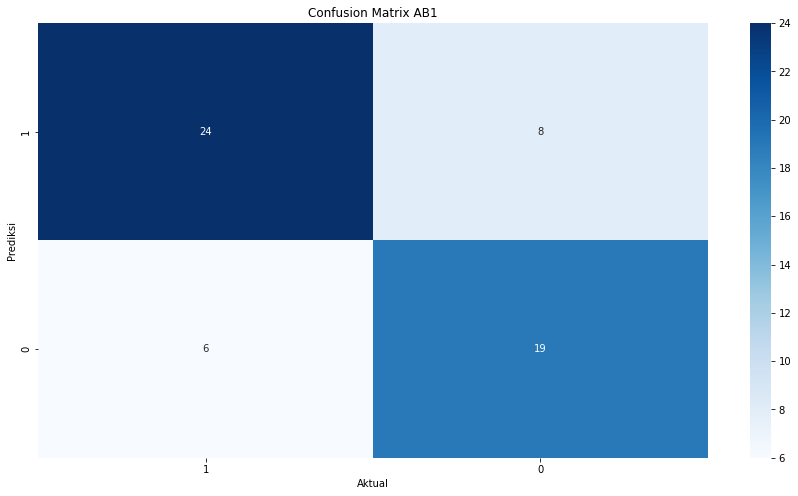

In [24]:
cf_matrix = metrics.confusion_matrix(y_test1, ab1_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### AB2

Fit model

In [26]:
ab2_model.fit(X_train2, y_train2)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

Hasil prediksi dengan data test

In [27]:
ab2_prediksi = ab2_model.predict(X_test2)
print("Accuracy : ", metrics.accuracy_score(y_test2, ab2_prediksi))
print("Precision: ", metrics.precision_score(y_test2, ab2_prediksi))
print("Recall   : ", metrics.recall_score(y_test2, ab2_prediksi))
print("F1 Score : ", metrics.f1_score(y_test2, ab2_prediksi))

Accuracy :  0.6491228070175439
Precision:  0.6785714285714286
Recall   :  0.6333333333333333
F1 Score :  0.6551724137931035


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

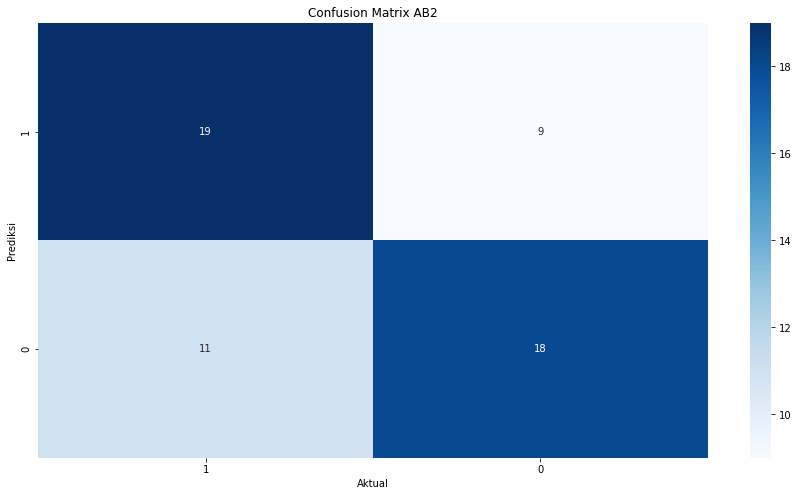

In [28]:
cf_matrix = metrics.confusion_matrix(y_test2, ab2_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB2') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### AB3

Fit model

In [29]:
ab3_model.fit(X_train3, y_train3)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

Prediksi dengan data test

In [30]:
ab3_prediksi = ab3_model.predict(X_test3)
print("Accuracy : ", metrics.accuracy_score(y_test3, ab3_prediksi))
print("Precision: ", metrics.precision_score(y_test3, ab3_prediksi))
print("Recall   : ", metrics.recall_score(y_test3, ab3_prediksi))
print("F1 Score : ", metrics.f1_score(y_test3, ab3_prediksi))

Accuracy :  0.6666666666666666
Precision:  0.6896551724137931
Recall   :  0.6666666666666666
F1 Score :  0.6779661016949153


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

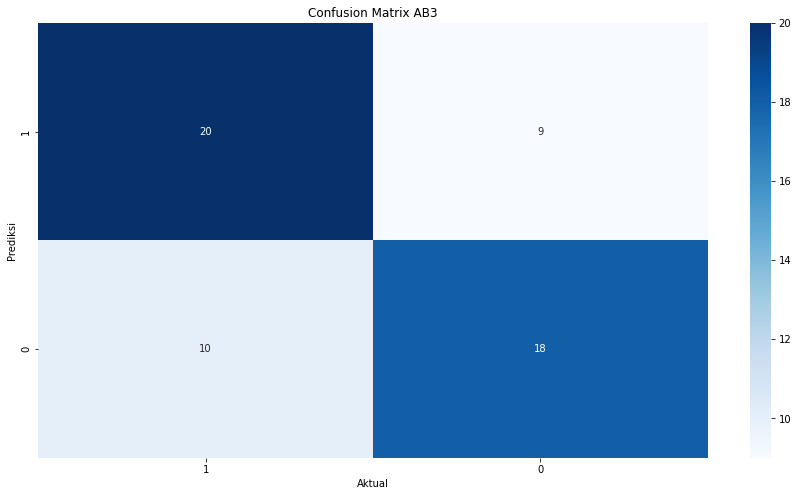

In [31]:
cf_matrix = metrics.confusion_matrix(y_test3, ab3_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB3') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Export

### Data Test

Label data test dengan hasil prediksi pada masing-masing model

In [33]:
test_microarray_prediksi = y_test1.to_frame()
test_microarray_prediksi['AB1'] = ab1_prediksi
test_microarray_prediksi['AB2'] = ab2_prediksi
test_microarray_prediksi['AB3'] = ab3_prediksi
test_microarray_prediksi

,Label,AB1,AB2,AB3
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.0
7,0.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0


Export ke CSV

In [34]:
test_microarray_prediksi.to_csv(r'test_microarray_prediksi_ab.csv', index=False, header=True)

### Suspect

Fit model

In [35]:
ab1_model.fit(X_train1, y_train1)
ab2_model.fit(X_train2, y_train2)
ab3_model.fit(X_train3, y_train3)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

Prediksi dengan Suspect

In [36]:
ab1_prediksi_suspect = ab1_model.predict(df_suspect1)
ab2_prediksi_suspect = ab2_model.predict(df_suspect2)
ab3_prediksi_suspect = ab3_model.predict(df_suspect3)

Melihat hasil prediksi masing-masing model

In [37]:
calon_dataframe = {'AB1' : ab1_prediksi_suspect,
                   'AB2' : ab2_prediksi_suspect,
                   'AB3' : ab3_prediksi_suspect}
suspect_prediksi = pd.DataFrame(calon_dataframe)
suspect_prediksi

,AB1,AB2,AB3
0,1.0,1.0,0.0
1,1.0,1.0,1.0
2,0.0,0.0,1.0
3,1.0,1.0,1.0
4,0.0,1.0,0.0


Export ke CSV

In [38]:
suspect_prediksi.to_csv(r'suspect_prediksi_ab.csv', index=False, header=True)